# Credit Card Risk Classification

---

## Modules and Setup

In [1]:
import os as os
from IPython.display import Markdown, display
import numpy as np
import pandas.api.types as ptypes
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt 

---

## 1. Project Overview

This project involves developing a machine learning model to classify individuals as low or high credit risks based on their attributes. Using a publicly available dataset, the goal is to accurately predict credit risk while exploring the underlying data and applying advanced modeling techniques.

---

## 2. Objectives

1. Perform exploratory data analysis (EDA) to understand the dataset and identify patterns
2. Preprocess and clean the data to prepare it for modeling
3. Build, evaluate, and compare multiple classification models
4. Interpret model results and provide further understanding of credit risk

---

## 3. Dataset

The [German Credit Risk](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data) includes attributes related to individuals' financial history and demographics, with a target variable indicating whether they are a low or high credit risk.

---

## 4. Workflow

### 4.1. Loading and Tidying the Data

In [2]:
credit_risk = fetch_ucirepo(id=144) 
X_coded = credit_risk.data.features 
y_coded = credit_risk.data.targets

In [3]:
X_coded.head() # Display the features of the dataset

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [4]:
y_coded.head() # Labels

,class
0,1
1,2
2,1
3,1
4,2


In [5]:
rows, cols = X_coded.shape
text = f"The DataFrame contains **{rows} rows** and **{cols} columns**."
display(Markdown(text))

The DataFrame contains **1000 rows** and **20 columns**.

In [6]:
X_coded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

The DataFrame has no missing values, but all of the variables are encoded. All categorical variables will be decoded.

### 4.1.1 Decoding the Variables

The values will be decoded based on their definitions in the *german* Word document. Since each attribute is unique to its respective column, all mappings will be combined into a single comprehensive dictionary. The qualitative labels will be shortened for clarity and conciseness.

In [7]:
attribute1_mapping = {
    "A11": "<0 DM",               # Less than 0 DM
    "A12": "0<= ...<200 DM",      # Between 0 and 200 DM
    "A13": ">=200 DM",            # Greater than or equal to 200 DM or salary commitments
    "A14": "No checking account"  # No checking account
}

attribute3_mapping = {
    "A30": "No credits/perfect",    # No credits or perfect repayment
    "A31": "Perfect at bank",       # Perfect repayment at this bank
    "A32": "Good repayment",        # Good current repayment
    "A33": "Delays",                # History of delays
    "A34": "Critical/other credits" # High-risk or external credits
}

attribute4_mapping = {
    "A40": "New car",
    "A41": "Used car",
    "A42": "Furniture/equipment",
    "A43": "Radio/TV",
    "A44": "Appliances",
    "A45": "Repairs",
    "A46": "Education",
    "A47": "Vacation (not used)",
    "A48": "Retraining",
    "A49": "Business",
    "A410": "Others"
}

attribute6_mapping = {
    "A61": "<100 DM",        # Less than 100 DM
    "A62": "100-499 DM",     # Between 100 and 499 DM
    "A63": "500-999 DM",     # Between 500 and 999 DM
    "A64": ">=1000 DM",      # 1000 DM or more
    "A65": "Unknown/None"    # Unknown or no savings account
}

attribute7_mapping = {
    "A71": "Unemployed",    # No current employment
    "A72": "<1 year",       # Less than 1 year
    "A73": "1-3 years",     # Between 1 and 3 years
    "A74": "4-6 years",     # Between 4 and 6 years
    "A75": ">=7 years"      # 7 years or more
}

attribute9_mapping = {
    "A91": "Male: divorced/separated",  # Male, divorced or separated
    "A92": "Female: divorced/married",  # Female, divorced, separated, or married
    "A93": "Male: single",              # Male, single
    "A94": "Male: married/widowed",     # Male, married or widowed
    "A95": "Female: single"             # Female, single
}

attribute10_mapping = {
    "A101": "None",          # No other debtors or guarantors
    "A102": "Co-signer",     # Co-signer is involved
    "A103": "Guarantor"      # Guarantor is involved
}

attribute12_mapping = {
    "A121": "Real estate",            # Owns real estate
    "A122": "Savings/life insurance", # Building society savings or life insurance (if not real estate)
    "A123": "Car/other property",     # Car or other property (if not real estate or savings)
    "A124": "Unknown/None"            # No property or unknown
}

attribute14_mapping = {
    "A141": "Bank",    # Installment plan through a bank
    "A142": "Stores",  # Installment plan through stores
    "A143": "None"     # No installment plan
}

attribute15_mapping = {
    "A151": "Rent",       # Renting a property
    "A152": "Own",        # Owns a property
    "A153": "For free"    # Lives for free (e.g., provided housing)
}

attribute17_mapping = {
    "A171": "Unemployed/non-resident",      # Unemployed or unskilled, non-resident
    "A172": "Unskilled/resident",           # Unskilled but resident
    "A173": "Skilled employee",             # Skilled employee or official
    "A174": "Management/highly qualified",  # Management, self-employed, or highly qualified
}

attribute19_mapping = {
    "A191": "None",       # No telephone
    "A192": "Yes",        # Registered Telephone
}

attribute20_mapping = {
    "A201": "Yes",  # Is a foreign worker
    "A202": "No"    # Is not a foreign worker
}

y_mapping = {
    1 : 'Low Risk',   # Individuals with good credit 
    2 : 'High Risk'   # Indididuals with bad credit
}


The dictionaries will be combined together into a single dictionary

In [8]:
all_attributes_mapping = (
    attribute1_mapping
    | attribute3_mapping
    | attribute4_mapping
    | attribute6_mapping
    | attribute7_mapping
    | attribute9_mapping
    | attribute10_mapping
    | attribute12_mapping
    | attribute14_mapping
    | attribute15_mapping
    | attribute17_mapping
    | attribute19_mapping
    | attribute20_mapping
)

The targets will be decoded.

In [9]:
y = y_coded['class'].map(y_mapping).copy()
y


0       Low Risk
1      High Risk
2       Low Risk
3       Low Risk
4      High Risk
         ...    
995     Low Risk
996     Low Risk
997     Low Risk
998    High Risk
999     Low Risk
Name: class, Length: 1000, dtype: object

Decoding all non-numerical features:

In [10]:
def df_decode(df:pd.DataFrame, dict:dict) -> pd.DataFrame:
    '''
    Replaces the values of the Dataframe with the ones within the dictionary
    parameters:
    df - A pandas dataframe
    dict - A non-nested dictionary with the values to replace key values
    Returns: A DataFrame
    '''
    df2 = df.copy()
    for i in range(0, df2.shape[1]):
        if ptypes.is_object_dtype(df.iloc[:, i]):
            df2.iloc[:, i] = df.iloc[:, i].map(dict)
    return df2

In [11]:
X = df_decode(df = X_coded, dict = all_attributes_mapping)
X.head(n = 10)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,<0 DM,6,Critical/other credits,Radio/TV,1169,Unknown/None,>=7 years,4,Male: single,None,4,Real estate,67,None,Own,2,Skilled employee,1,Yes,Yes
1,0<= ...<200 DM,48,Good repayment,Radio/TV,5951,<100 DM,1-3 years,2,Female: divorced/married,None,2,Real estate,22,None,Own,1,Skilled employee,1,None,Yes
2,No checking account,12,Critical/other credits,Education,2096,<100 DM,4-6 years,2,Male: single,None,3,Real estate,49,None,Own,1,Unskilled/resident,2,None,Yes
3,<0 DM,42,Good repayment,Furniture/equipment,7882,<100 DM,4-6 years,2,Male: single,Guarantor,4,Savings/life insurance,45,None,For free,1,Skilled employee,2,None,Yes
4,<0 DM,24,Delays,New car,4870,<100 DM,1-3 years,3,Male: single,None,4,Unknown/None,53,None,For free,2,Skilled employee,2,None,Yes
5,No checking account,36,Good repayment,Education,9055,Unknown/None,1-3 years,2,Male: single,None,4,Unknown/None,35,None,For free,1,Unskilled/resident,2,Yes,Yes
6,No checking account,24,Good repayment,Furniture/equipment,2835,500-999 DM,>=7 years,3,Male: single,None,4,Savings/life insurance,53,None,Own,1,Skilled employee,1,None,Yes
7,0<= ...<200 DM,36,Good repayment,Used car,6948,<100 DM,1-3 years,2,Male: single,None,2,Car/other property,35,None,Rent,1,Management/highly qualified,1,Yes,Yes
8,No checking account,12,Good repayment,Radio/TV,3059,>=1000 DM,4-6 years,2,Male: divorced/separated,None,4,Real estate,61,None,Own,1,Unskilled/resident,1,None,Yes
9,0<= ...<200 DM,30,Critical/other credits,New car,5234,<100 DM,Unemployed,4,Male: married/widowed,None,2,Car/other property,28,None,Own,2,Management/highly qualified,1,None,Yes


The columns will be renamed for clarity:

In [12]:
attribute_names = [
    "CheckingAccountStatus",  # Status of existing checking account
    "LoanDurationMonths",     # Duration of the loan in months
    "CreditHistory",          # Credit history
    "LoanPurpose",            # Purpose of the loan
    "CreditAmount",           # Credit amount
    "SavingsAccountBonds",    # Savings account or bonds
    "EmploymentDuration",     # Present employment duration
    "InstallmentRate",        # Installment rate (% of disposable income)
    "PersonalStatusSex",      # Personal status and sex
    "OtherDebtorsGuarantors", # Other debtors or guarantors
    "ResidenceDuration",      # Present residence duration
    "PropertyOwnership",      # Property ownership
    "AgeYears",               # Age in years
    "OtherInstallmentPlans",  # Other installment plans
    "HousingStatus",          # Housing
    "ExistingCredits",        # Number of existing credits at this bank
    "JobType",                # Job type
    "Dependents",             # Number of dependents
    "Telephone",              # Telephone availability
    "ForeignWorker"           # Foreign worker status
]
X.columns = attribute_names
X.head()

,CheckingAccountStatus,LoanDurationMonths,CreditHistory,LoanPurpose,CreditAmount,SavingsAccountBonds,EmploymentDuration,InstallmentRate,PersonalStatusSex,OtherDebtorsGuarantors,ResidenceDuration,PropertyOwnership,AgeYears,OtherInstallmentPlans,HousingStatus,ExistingCredits,JobType,Dependents,Telephone,ForeignWorker
0,<0 DM,6,Critical/other credits,Radio/TV,1169,Unknown/None,>=7 years,4,Male: single,None,4,Real estate,67,None,Own,2,Skilled employee,1,Yes,Yes
1,0<= ...<200 DM,48,Good repayment,Radio/TV,5951,<100 DM,1-3 years,2,Female: divorced/married,None,2,Real estate,22,None,Own,1,Skilled employee,1,None,Yes
2,No checking account,12,Critical/other credits,Education,2096,<100 DM,4-6 years,2,Male: single,None,3,Real estate,49,None,Own,1,Unskilled/resident,2,None,Yes
3,<0 DM,42,Good repayment,Furniture/equipment,7882,<100 DM,4-6 years,2,Male: single,Guarantor,4,Savings/life insurance,45,None,For free,1,Skilled employee,2,None,Yes
4,<0 DM,24,Delays,New car,4870,<100 DM,1-3 years,3,Male: single,None,4,Unknown/None,53,None,For free,2,Skilled employee,2,None,Yes


In [13]:
X.duplicated().sum() # No duplicate rows

np.int64(0)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CheckingAccountStatus   1000 non-null   object
 1   LoanDurationMonths      1000 non-null   int64 
 2   CreditHistory           1000 non-null   object
 3   LoanPurpose             1000 non-null   object
 4   CreditAmount            1000 non-null   int64 
 5   SavingsAccountBonds     1000 non-null   object
 6   EmploymentDuration      1000 non-null   object
 7   InstallmentRate         1000 non-null   int64 
 8   PersonalStatusSex       1000 non-null   object
 9   OtherDebtorsGuarantors  1000 non-null   object
 10  ResidenceDuration       1000 non-null   int64 
 11  PropertyOwnership       1000 non-null   object
 12  AgeYears                1000 non-null   int64 
 13  OtherInstallmentPlans   1000 non-null   object
 14  HousingStatus           1000 non-null   object
 15  Exist

No missing values in the table and all Dtype are correct for all of the columns.

---

### 4.2. Exploratory Data Analysis (EDA)

### 4.2.1. Overview of the Dataset

Numerical summary of the features for the dataset:

In [15]:
X.describe()

,LoanDurationMonths,CreditAmount,InstallmentRate,ResidenceDuration,AgeYears,ExistingCredits,Dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Categorical summary of the features:

In [16]:
X.describe(include = np.object_)

,CheckingAccountStatus,CreditHistory,LoanPurpose,SavingsAccountBonds,EmploymentDuration,PersonalStatusSex,OtherDebtorsGuarantors,PropertyOwnership,OtherInstallmentPlans,HousingStatus,JobType,Telephone,ForeignWorker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,No checking account,Good repayment,Radio/TV,<100 DM,1-3 years,Male: single,None,Car/other property,None,Own,Skilled employee,None,Yes
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


In [17]:
t1 = X.describe(include = np.object_)
t1.loc['Ratio_of_tio'] = t1.iloc[3, :] / t1.iloc[0, :]
t1

,CheckingAccountStatus,CreditHistory,LoanPurpose,SavingsAccountBonds,EmploymentDuration,PersonalStatusSex,OtherDebtorsGuarantors,PropertyOwnership,OtherInstallmentPlans,HousingStatus,JobType,Telephone,ForeignWorker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,No checking account,Good repayment,Radio/TV,<100 DM,1-3 years,Male: single,None,Car/other property,None,Own,Skilled employee,None,Yes
freq,394,530,280,603,339,548,907,332,814,713,630,596,963
Ratio_of_tio,0.394,0.53,0.28,0.603,0.339,0.548,0.907,0.332,0.814,0.713,0.63,0.596,0.963


There appear to be several categorial class  that dominate for some of the different features within the dataset.

### 4.2.2 Target Variable Analysis

The target variable will be analyzed to determine its distribution.

In [76]:
figures_folder = os.path.join(os.getcwd(), r'outputs/visuals/') # Assumes cwd directory is the top directory of the project
figures_folder

'c:\\Samir\\Programming\\python_projects\\Credit-Risk-Classification\\outputs/visuals/'

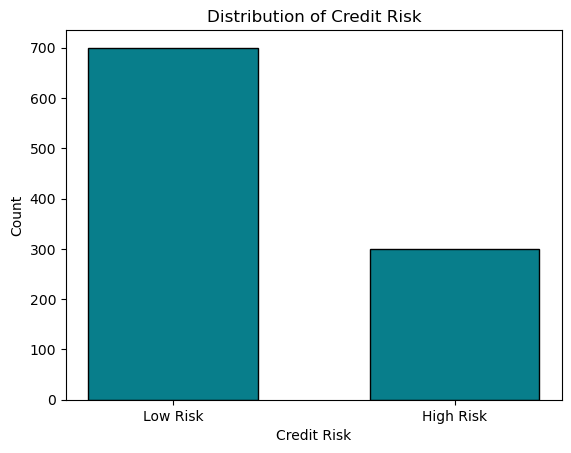

In [19]:
plt.bar(x = y.value_counts().index , height = y.value_counts().values, 
        width = 0.6, 
        color = '#087E8B',
        edgecolor = 'black')
plt.xlabel(xlabel = 'Credit Risk')
plt.ylabel(ylabel = 'Count')
plt.title(label = 'Distribution of Credit Risk')

file_path = os.path.join(figures_folder, 'Target_variable_distribution.png')
plt.savefig(file_path)

plt.show();

There is a 70/30 split between low-risk and high-risk individuals, indicating an unbalanced dataset. According to the data documentation, misclassifying high-risk individuals as low-risk should incur a higher penalty compared to misclassifying low-risk individuals as high-risk. This imbalance will be addressed when developing the models.

### 4.2.3 Univariate Analysis

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CheckingAccountStatus   1000 non-null   object
 1   LoanDurationMonths      1000 non-null   int64 
 2   CreditHistory           1000 non-null   object
 3   LoanPurpose             1000 non-null   object
 4   CreditAmount            1000 non-null   int64 
 5   SavingsAccountBonds     1000 non-null   object
 6   EmploymentDuration      1000 non-null   object
 7   InstallmentRate         1000 non-null   int64 
 8   PersonalStatusSex       1000 non-null   object
 9   OtherDebtorsGuarantors  1000 non-null   object
 10  ResidenceDuration       1000 non-null   int64 
 11  PropertyOwnership       1000 non-null   object
 12  AgeYears                1000 non-null   int64 
 13  OtherInstallmentPlans   1000 non-null   object
 14  HousingStatus           1000 non-null   object
 15  Exist

#### 4.2.3.1 Numerical Variables

The following will be an assessment of the numerical features of the dataset, with the purpose of identifying skewness, outliers, or unusual distributions. A function will be created to generate histograms more easily. The bar_graph() function will be used for quantitative attributes with discrete values.

In [21]:
def histo(X: pd.Series, title: str = '', xlabel: str = '', ylabel: str = '', filename: str = '', **kwargs):
    '''Display a density histogram overlaid with a PDF curve for a normal distribution. Optionally save the figure.'''
    # Plot histogram
    plt.hist(x = X, bins = 20, color = kwargs.get('color', '#087E8B'), edgecolor = 'black', density = True)

    # Fit normal distribution
    mu, std = norm.fit(X)  # Mean and standard deviation
    xmin, xmax = plt.xlim()
    x = np.linspace(start=xmin, stop=xmax, num=100)
    p = norm.pdf(x, mu, std)  # PDF for normal distribution

    # Plot normal distribution curve
    plt.plot(x, p, 'k', linewidth=2)

    # Set labels and title
    plt.xlabel(xlabel if xlabel else 'X-axis')
    plt.ylabel(ylabel if ylabel else 'Density')
    plt.title(title if title else 'Histogram with Normal PDF')

    # Add text box for mean and standard deviation
    plt.figtext(
        x = kwargs.get('figtext_x', 0.75),
        y = kwargs.get('figtext_y', 0.815),
        s = f'Mean: {mu:.2f} \nSD: {std:.2f}',
        fontsize = 10,
        bbox=dict(
            boxstyle = kwargs.get('boxstyle', 'square'),
            facecolor = kwargs.get('facecolor', 'lightblue'),
            edgecolor = kwargs.get('edgecolor', 'black'),
            alpha = kwargs.get('alpha', 1)
        )
    )

    # Save the figure if filename is provided
    if filename:
        # Ensure the output folder exists
        figures_folder = os.path.join(os.getcwd(), 'outputs', 'visuals')
        os.makedirs(figures_folder, exist_ok=True)  # Create the folder if it doesn't exist

        # Build full path and save the figure
        full_path = os.path.join(figures_folder, filename)
        plt.savefig(full_path, bbox_inches='tight')
        # print(f"Figure saved as {full_path}") Remove this to indicate whether or not file was saved

    # Show plot
    plt.show()




In [22]:
def bar_graph(X: pd.Series, title: str = '', xlabel: str = '', ylabel: str = '', filename: str = '', **kwargs):
    '''Display a bar graph for a pd.Series. Optionally saves the figure.'''
    
    # Plot Bar
    plt.bar(x = X.value_counts().index, 
            height = X.value_counts().values, 
            color = kwargs.get('color', '#087E8B'), 
            edgecolor = kwargs.get('edgecolor', 'black'))
    
    # Set labels and title
    plt.xlabel(xlabel if xlabel else 'X-axis')
    plt.ylabel(ylabel if ylabel else 'Count')
    plt.title(title if title else 'Bar Plot')

    # Customize ticks
    plt.xticks(ticks=X.value_counts().index, 
               labels = kwargs.get('labels', X.value_counts().index))
    
    if kwargs.get('yticks'):  # Only set yticks if explicitly provided
        plt.yticks(ticks = kwargs['yticks'])

    # Save the figure if filename is provided
    if filename:
        # Ensure the output folder exists
        figures_folder = os.path.join(os.getcwd(), 'outputs', 'visuals')
        os.makedirs(figures_folder, exist_ok=True)  # Create the folder if it doesn't exist

        # Build full path and save the figure
        full_path = os.path.join(figures_folder, filename)
        plt.savefig(full_path, bbox_inches='tight')
        # print(f"Figure saved as {full_path}") Remove to confirm confirmation of save

    # Show the plot
    plt.show()


##### 4.2.3.1.1. LoanDurationMonths

In [23]:
X['LoanDurationMonths'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: LoanDurationMonths, dtype: float64

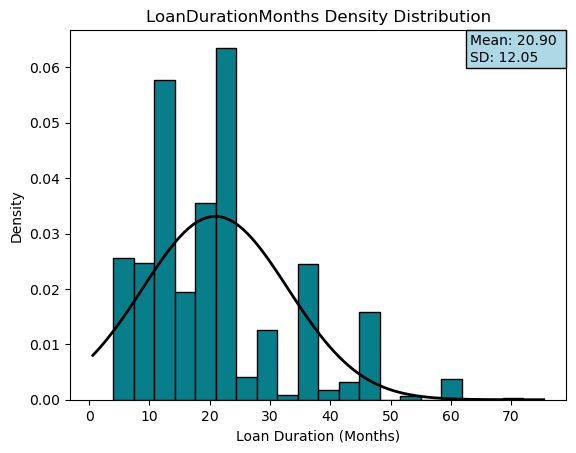

In [24]:
histo(X['LoanDurationMonths'], 
      xlabel = 'Loan Duration (Months)', 
      ylabel = 'Density', 
      title = 'LoanDurationMonths Density Distribution',
      filename = 'LonaDurationMonths_Distribution.png')

##### 4.2.3.1.2. CreditAmount

In [25]:
X['CreditAmount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: CreditAmount, dtype: float64

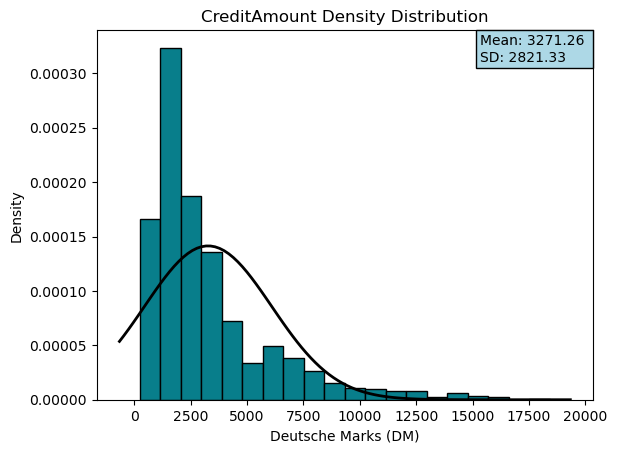

In [26]:
histo(X=X['CreditAmount'],
      xlabel='Deutsche Marks (DM)',
      ylabel='Density',
      title='CreditAmount Density Distribution',
      figtext_x = 0.724,
      filename = 'CreditAmount_DensityDistribution')


*CreditAmount* displays heavy right skew.

##### 4.2.3.1.3. InstallmentRate

In [27]:
X['InstallmentRate'].describe()

count    1000.000000
mean        2.973000
std         1.118715
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: InstallmentRate, dtype: float64

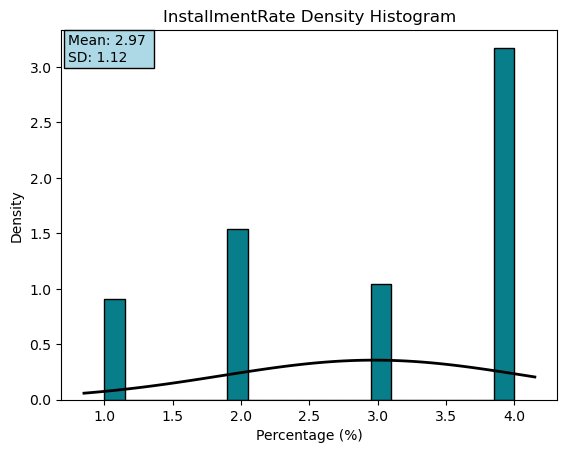

In [28]:
histo(X = X['InstallmentRate'],
      xlabel = 'Percentage (%)',
      ylabel = 'Density',
      title = 'InstallmentRate Density Histogram',
      filename = 'InstallmentRate_DensityHistogram',
      figtext_x = 0.135)

A majority of German individuals have an installment rate equal to 4% of their disposable income.

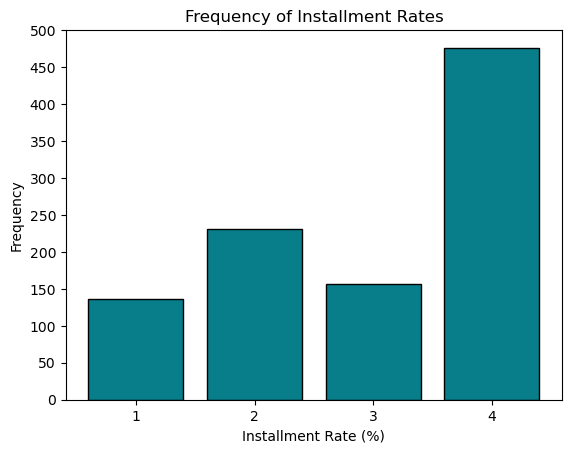

In [29]:
bar_graph(X = X['InstallmentRate'],
          xlabel = 'Installment Rate (%)',
          ylabel = 'Frequency',
          title = 'Frequency of Installment Rates',
          yticks = list(range(0, 550, 50)),
          filename = 'InstallmentRate_Bar.png')

##### 4.2.3.1.4. ResidenceDuration 

In [30]:
X['ResidenceDuration'].describe()

count    1000.000000
mean        2.845000
std         1.103718
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: ResidenceDuration, dtype: float64

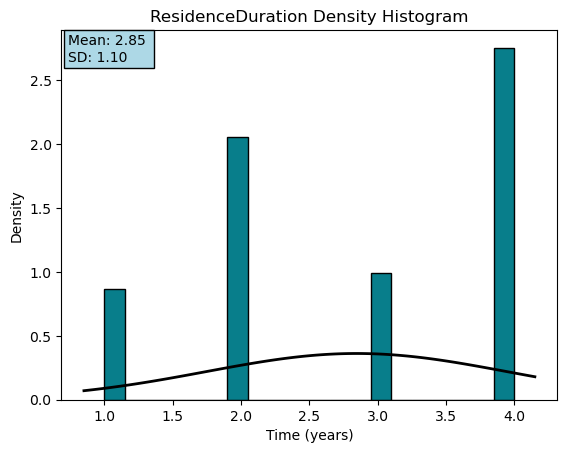

In [31]:
histo(X = X['ResidenceDuration'],
      xlabel = 'Time (years)',
      ylabel = 'Density',
      title = 'ResidenceDuration Density Histogram',
      filename = 'ResidenceDuration_DensityHistogram',
      figtext_x = 0.135)

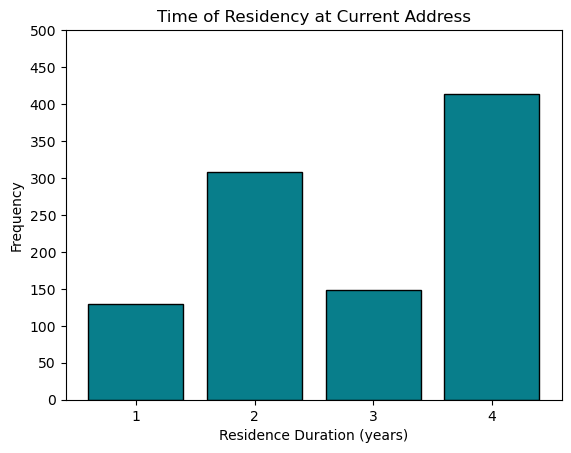

In [32]:
bar_graph(X = X['ResidenceDuration'],
          xlabel = 'Residence Duration (years)',
          ylabel = 'Frequency',
          title = 'Time of Residency at Current Address',
          yticks = list(range(0, 550, 50)),
          filename = 'ResidenceDuration_Bar.png')

##### 4.2.3.1.5. AgeYears

In [33]:
X['AgeYears'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: AgeYears, dtype: float64

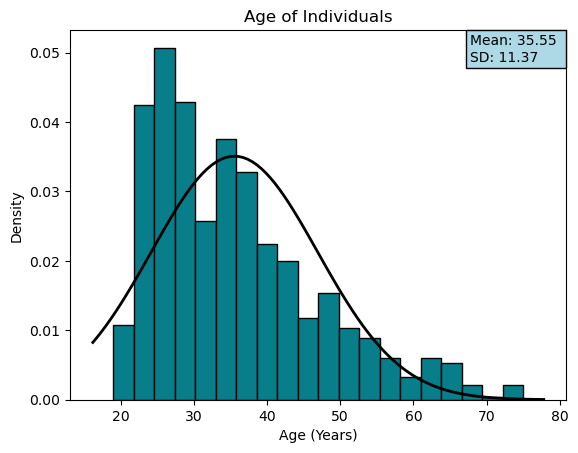

In [34]:
histo(X = X['AgeYears'],
      xlabel = 'Age (Years)',
      title = 'Age of Individuals',
      filename = 'AgeYears_Distribution.png')

*AgeYears* is slighly right-skewed toward older individuals

##### 4.2.3.1.6. ExistingCredits

In [35]:
X['ExistingCredits'].describe()

count    1000.000000
mean        1.407000
std         0.577654
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: ExistingCredits, dtype: float64

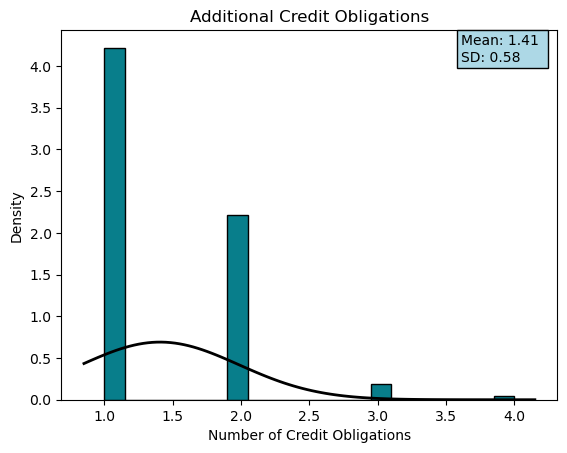

In [36]:
histo(X = X['ExistingCredits'],
      xlabel = 'Number of Credit Obligations',
      title = 'Additional Credit Obligations',
      filename = 'ExistingCredit_histogram.png')

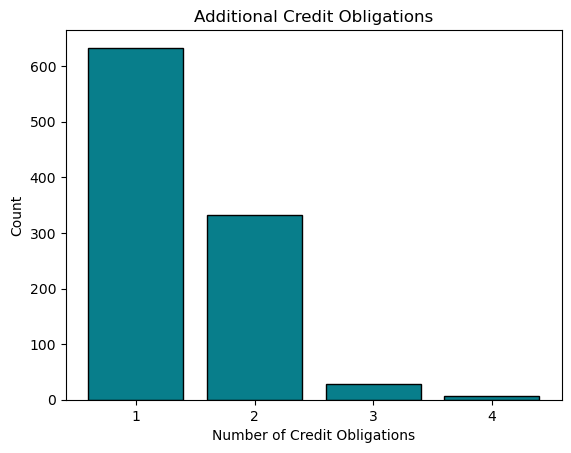

In [37]:
bar_graph(X = X['ExistingCredits'],
          xlabel = 'Number of Credit Obligations',
          title = 'Additional Credit Obligations',
          filename = 'ExistingCredit_bar.png')

A vast majority of individuals appear to have only 1 or 2 additional credit obligations with their bank.

##### 4.2.3.1.7. Dependents

In [38]:
X['Dependents'].describe()

count    1000.000000
mean        1.155000
std         0.362086
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Dependents, dtype: float64

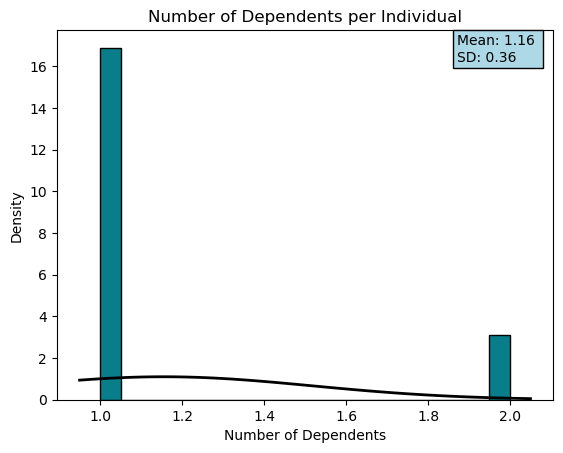

In [39]:
histo(X = X['Dependents'],
      xlabel = 'Number of Dependents',
      title = 'Number of Dependents per Individual',
      filename = 'Dependents_histogram.png')

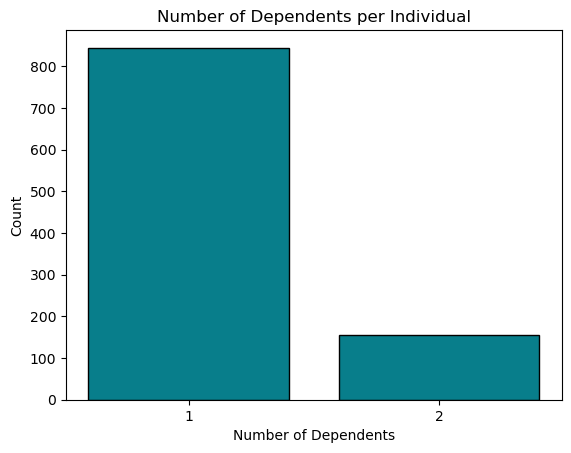

In [40]:
bar_graph(X = X['Dependents'],
          xlabel = 'Number of Dependents',
          title = 'Number of Dependents per Individual',
          filename = 'Dependents_bar.png')

Most individuals within the dataset only have 1 dependent

#### 4.2.3.2. Categorical Features

The following will be an assessment of the categorical features of the dataset, with the purpose of distributions and imbalances within the attributes.

##### 4.2.3.2.1. CheckingAccountStatus

In [41]:
X['CheckingAccountStatus'].describe()

count                    1000
unique                      4
top       No checking account
freq                      394
Name: CheckingAccountStatus, dtype: object

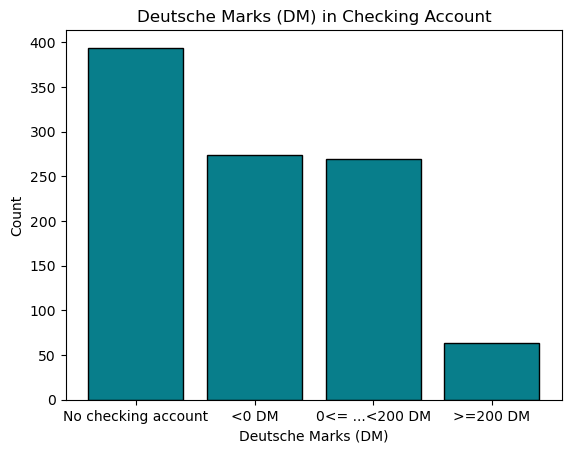

In [42]:
bar_graph(X = X['CheckingAccountStatus'],
          title = 'Deutsche Marks (DM) in Checking Account',
          xlabel = 'Deutsche Marks (DM)',
          filename = 'CheckingAccount_bar.png')

##### 4.2.3.2.2. CreditHistory

In [43]:
X['CreditHistory'].describe()

count               1000
unique                 5
top       Good repayment
freq                 530
Name: CreditHistory, dtype: object

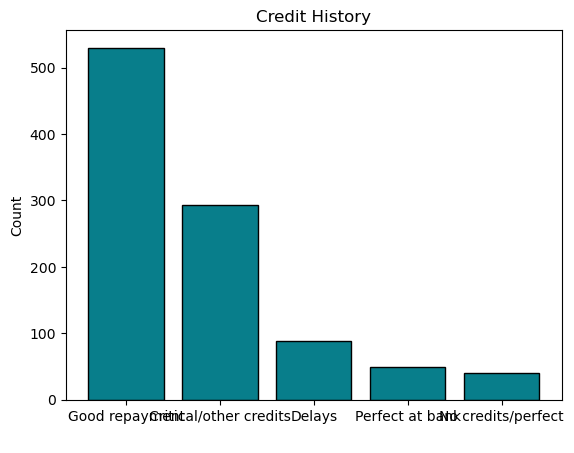

In [44]:
bar_graph(X = X['CreditHistory'],
          title = 'Credit History',
          xlabel = ' ',
          filename = 'CreditHistory_bar.png')

Most individuals appear to repay their loans and credits without issue.

##### 4.2.3.2.3. LoanPurpose

In [45]:
X['LoanPurpose'].describe()

count         1000
unique          10
top       Radio/TV
freq           280
Name: LoanPurpose, dtype: object

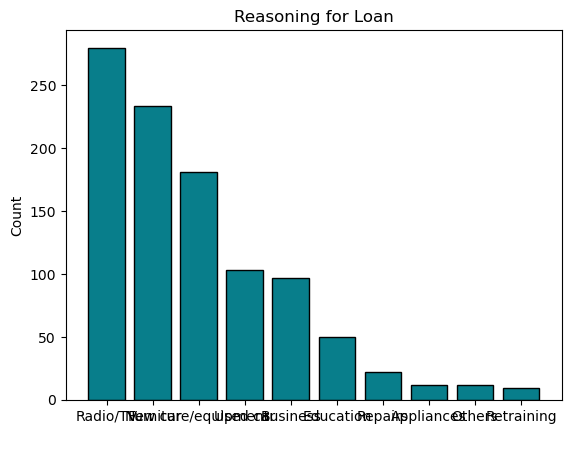

In [46]:
bar_graph(X = X['LoanPurpose'],
          title = 'Reasoning for Loan',
          xlabel = ' ',
          filename = 'LoanPurpose_bar.png')

##### 4.2.3.2.4. SavingsAccountBonds

In [47]:
X['SavingsAccountBonds'].describe()

count        1000
unique          5
top       <100 DM
freq          603
Name: SavingsAccountBonds, dtype: object

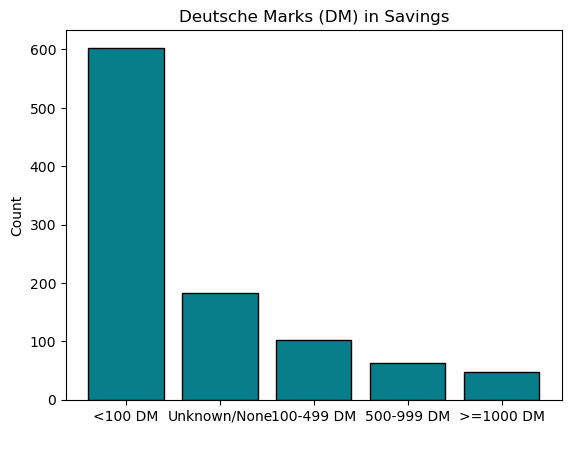

In [48]:
bar_graph(X = X['SavingsAccountBonds'],
          title = 'Deutsche Marks (DM) in Savings',
          xlabel = ' ',
          filename = 'SavingsAccountBonds_bar.png')

Vast majority of invidiuals have less than <100 DM or no savings.

##### 4.2.3.2.5. EmploymentDuration 

In [49]:
X['EmploymentDuration'].describe()

count          1000
unique            5
top       1-3 years
freq            339
Name: EmploymentDuration, dtype: object

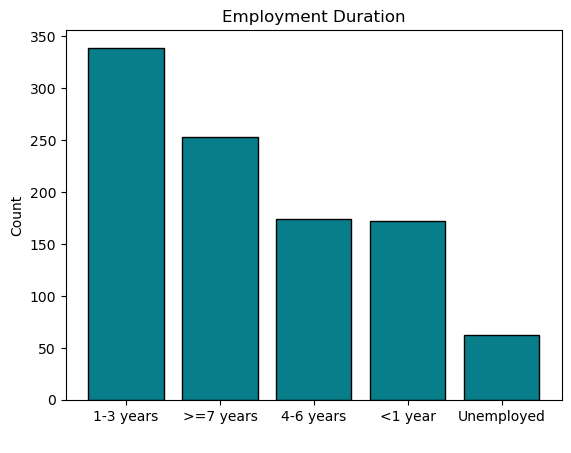

In [50]:
bar_graph(X = X['EmploymentDuration'],
          title = 'Employment Duration',
          xlabel = ' ',
          filename = 'EmploymentDuration_bar.png')

##### 4.2.3.2.6. PersonalStatusSex

In [51]:
X['PersonalStatusSex'].describe()

count             1000
unique               4
top       Male: single
freq               548
Name: PersonalStatusSex, dtype: object

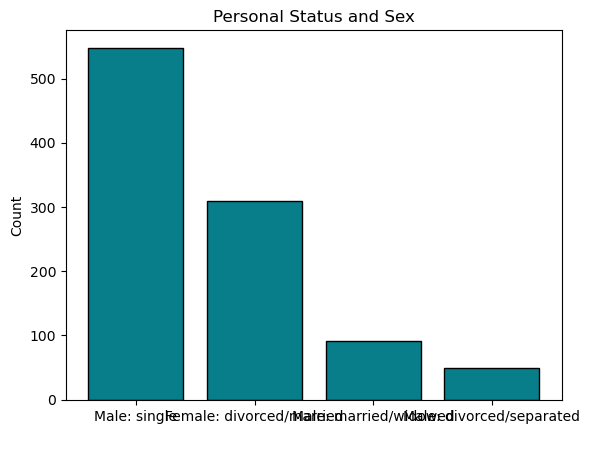

In [52]:
bar_graph(X = X['PersonalStatusSex'],
          title = 'Personal Status and Sex',
          xlabel = ' ',
          filename = 'PersonalStatusSex_bar.png')

Dataset is heavily skewed toward men.

##### 4.2.3.2.7. OtherDebtorsGuarantors 

In [53]:
X['OtherDebtorsGuarantors'].describe()

count     1000
unique       3
top       None
freq       907
Name: OtherDebtorsGuarantors, dtype: object

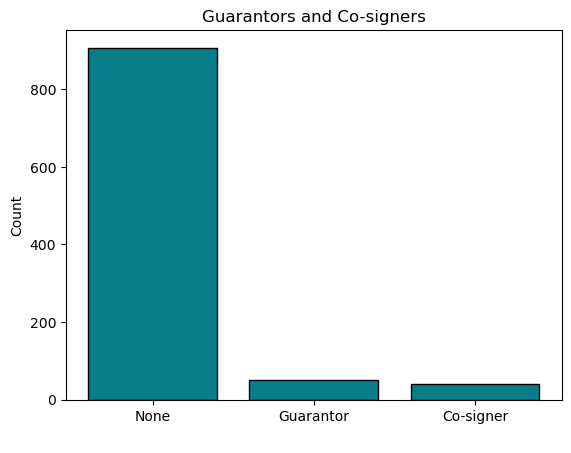

In [54]:
bar_graph(X = X['OtherDebtorsGuarantors'],
          title = 'Guarantors and Co-signers',
          xlabel = ' ',
          filename = 'OtherDebtorsGuarantors_bar.png')

Most individuals do not have a Guarantor or Co-signer.

##### 4.2.3.2.8. PropertyOwnership  

In [55]:
X['PropertyOwnership'].describe()

count                   1000
unique                     4
top       Car/other property
freq                     332
Name: PropertyOwnership, dtype: object

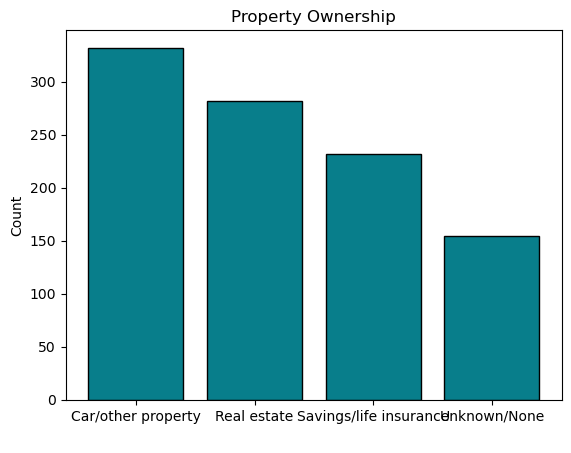

In [56]:
bar_graph(X = X['PropertyOwnership'],
          title = 'Property Ownership',
          xlabel = ' ',
          filename = 'PropertyOwnership_bar.png')

##### 4.2.3.2.8. OtherInstallmentPlans

In [57]:
X['OtherInstallmentPlans'].describe()

count     1000
unique       3
top       None
freq       814
Name: OtherInstallmentPlans, dtype: object

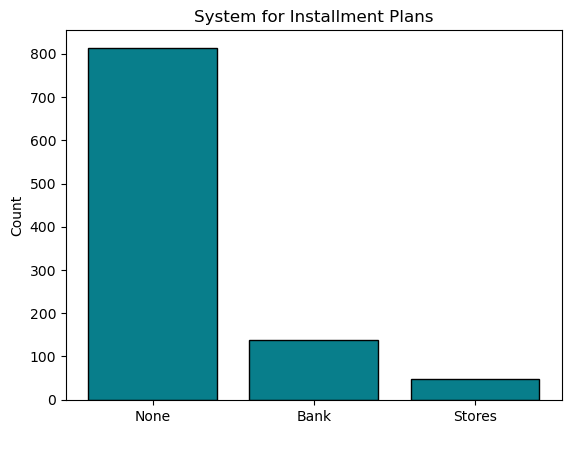

In [58]:
bar_graph(X = X['OtherInstallmentPlans'],
          title = 'System for Installment Plans',
          xlabel = ' ',
          filename = 'OtherInstallmentPlans_bar.png')

##### 4.2.3.2.9. HousingStatus 

In [59]:
X['HousingStatus'].describe()

count     1000
unique       3
top        Own
freq       713
Name: HousingStatus, dtype: object

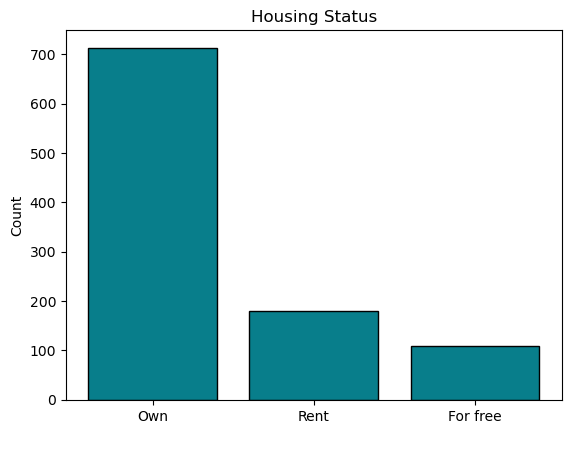

In [60]:
bar_graph(X = X['HousingStatus'],
          title = 'Housing Status',
          xlabel = ' ',
          filename = 'HousingStatus_bar.png')

##### 4.2.3.2.10. JobType

In [61]:
X['JobType'].describe()

count                 1000
unique                   4
top       Skilled employee
freq                   630
Name: JobType, dtype: object

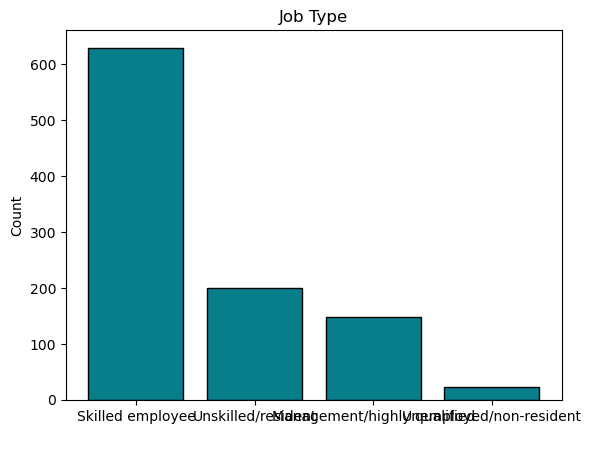

In [62]:
bar_graph(X = X['JobType'],
          title = 'Job Type',
          xlabel = ' ',
          filename = 'JobType_bar.png')

##### 4.2.3.2.11. Telephone

In [63]:
X['Telephone'].describe()

count     1000
unique       2
top       None
freq       596
Name: Telephone, dtype: object

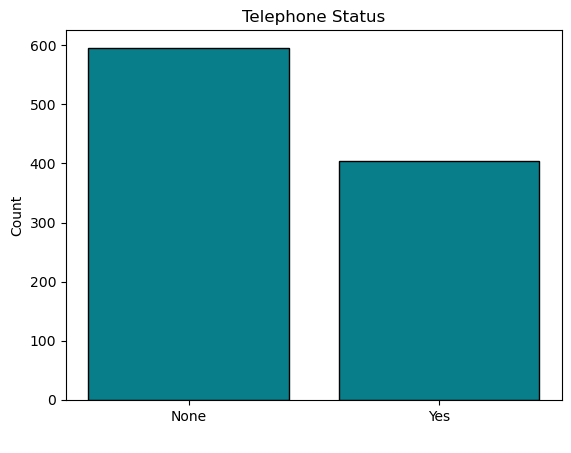

In [64]:
bar_graph(X = X['Telephone'],
          title = 'Telephone Status',
          xlabel = ' ',
          filename = 'Telephone_bar.png')

Suprisingly many individuals do not own a telephone.

##### 4.2.3.2.12. ForeignWorker

In [65]:
X['ForeignWorker'].describe()

count     1000
unique       2
top        Yes
freq       963
Name: ForeignWorker, dtype: object

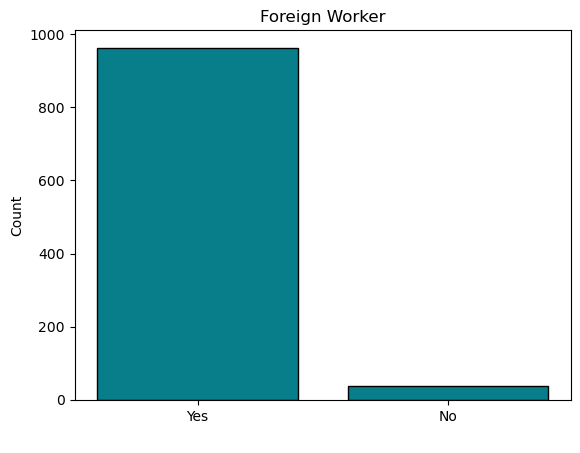

In [66]:
bar_graph(X = X['ForeignWorker'],
          title = 'Foreign Worker',
          xlabel = ' ',
          filename = 'ForeignWorker_bar.png')

The vast majority of Germans are citizens.

### 4.2.4. Bivariate Analysis

In [67]:
df = X.copy()
df['CreditRisk'] = y
df.head()

,CheckingAccountStatus,LoanDurationMonths,CreditHistory,LoanPurpose,CreditAmount,SavingsAccountBonds,EmploymentDuration,InstallmentRate,PersonalStatusSex,OtherDebtorsGuarantors,...,PropertyOwnership,AgeYears,OtherInstallmentPlans,HousingStatus,ExistingCredits,JobType,Dependents,Telephone,ForeignWorker,CreditRisk
0,<0 DM,6,Critical/other credits,Radio/TV,1169,Unknown/None,>=7 years,4,Male: single,None,...,Real estate,67,None,Own,2,Skilled employee,1,Yes,Yes,Low Risk
1,0<= ...<200 DM,48,Good repayment,Radio/TV,5951,<100 DM,1-3 years,2,Female: divorced/married,None,...,Real estate,22,None,Own,1,Skilled employee,1,None,Yes,High Risk
2,No checking account,12,Critical/other credits,Education,2096,<100 DM,4-6 years,2,Male: single,None,...,Real estate,49,None,Own,1,Unskilled/resident,2,None,Yes,Low Risk
3,<0 DM,42,Good repayment,Furniture/equipment,7882,<100 DM,4-6 years,2,Male: single,Guarantor,...,Savings/life insurance,45,None,For free,1,Skilled employee,2,None,Yes,Low Risk
4,<0 DM,24,Delays,New car,4870,<100 DM,1-3 years,3,Male: single,None,...,Unknown/None,53,None,For free,2,Skilled employee,2,None,Yes,High Risk


#### 4.2.4.1. Numerical Variables

A function will be created to streamline the creation of boxplots and bargraphs

In [77]:
def boxplot(data: pd.DataFrame, x: str, y: str, title :str = '', xlabel: str = '', ylabel:str = '', filename:str = '', orient: str = '', **kwargs):
    '''Function to create a boxplot based on a categorical variable. Optionally saves the figure'''
    boxplot_params = {'data': data,
                      'x': x,
                      'y': y,
                      'notch': kwargs.get('notch', True),
                      'color': kwargs.get('color', '#087E8B'),
                      'width': kwargs.get('width', 0.5)}
    
    if orient:
        boxplot_params['orient'] = orient
    
    # Plot boxplot
    ax = sns.boxplot(**boxplot_params)
    
    # Set title
    if title:
        ax.set_title(title)

    # Set x and y labels
    ax.set_xlabel(xlabel if xlabel else x)
    ax.set_ylabel(ylabel if ylabel else y)
    
    
    if 'xticklabels' in kwargs:
        ax.set_xticklabels(kwargs['xticklabels'], rotation=kwargs.get('xtick_rotation', 0))

    # Save the figure if filename is provided
    if filename:
        # Ensure the output folder exists
        figures_folder = os.path.join(os.getcwd(), 'outputs', 'visuals')
        os.makedirs(figures_folder, exist_ok=True)  # Create the folder if it doesn't exist

        # Build full path and save the figure
        full_path = os.path.join(figures_folder, filename)
        plt.savefig(full_path, bbox_inches='tight')
        # print(f"Figure saved as {full_path}") Remove this to indicate whether or not file was saved

    plt.show()
    plt.close()


In [95]:
def bar_graph(data: pd.DataFrame, x: str, title: str = '', xlabel: str = '', ylabel: str = '', filename: str = '', hue: str = '', **kwargs):
    '''Function to create a bar graph for a categorical variable. Optionally saves the figure.'''
    
    barplot_params = {'data': data,
                      'x': x,
                      'hue': hue if hue else None,  # Allows for grouping by a categorical variable
                      'palette': kwargs.get('palette', 'Blues'),
                      'edgecolor': kwargs.get('edgecolor', 'black')}
    
    # Plot bar graph
    ax = sns.countplot(**barplot_params)

    # Set title
    if title:
        ax.set_title(title)

    # Set x and y labels
    ax.set_xlabel(xlabel if xlabel else x)
    ax.set_ylabel(ylabel if ylabel else 'Count')

    # Adjust x-tick labels if provided
    if 'xticklabels' in kwargs:
        ax.set_xticklabels(kwargs['xticklabels'], rotation=kwargs.get('xtick_rotation', 0))

    # Fix 
    plt.xticks(rotation=kwargs.get('xtick_rotation', 45), ha='right')

    # Save the figure if filename is provided
    if filename:
        # Ensure the output folder exists
        figures_folder = os.path.join(os.getcwd(), 'outputs', 'visuals')
        os.makedirs(figures_folder, exist_ok=True)  # Create the folder if it doesn't exist

        # Build full path and save the figure
        full_path = os.path.join(figures_folder, filename)
        plt.savefig(full_path, bbox_inches='tight')
        # print(f"Figure saved as {full_path}") Remove this to indicate whether or not file was saved

    plt.show()
    plt.close()


##### 4.2.4.1.1. LoanDurationMonths and CreditRisk

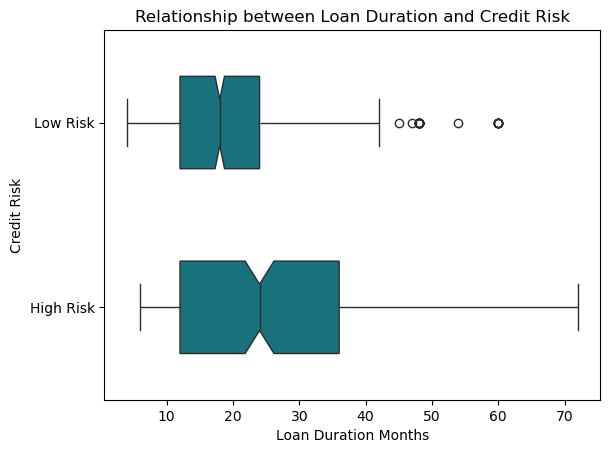

In [78]:
boxplot(data = df, 
        x = 'LoanDurationMonths', 
        y = 'CreditRisk', 
        xlabel = 'Loan Duration Months',
        ylabel = 'Credit Risk',
        title = 'Relationship between Loan Duration and Credit Risk',
        filename = 'LoanDuration_CreditRisk_boxplot.png')

Longer loan durations appear to be signficantly associated with higher credit risk potentially due to increased uncertainty over extended periods.

##### 4.2.3.1.2. CreditAmount and CreditRisk

*CreditAmount* represents the total amount of money requested or approved for a loan. Higher credit amounts could be associated with higher credit risk, as larger loans may be harder to repay.

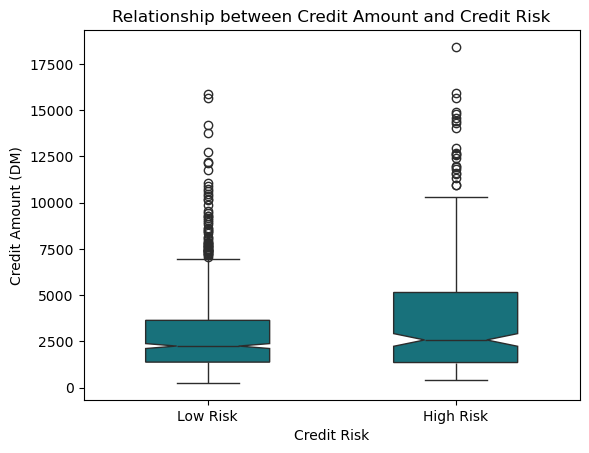

In [ ]:
boxplot(data = df, 
        x = 'CreditRisk', 
        y = 'CreditAmount', 
        xlabel = 'Credit Risk', 
        ylabel = 'Credit Amount (DM)', 
        title = 'Relationship between Credit Amount and Credit Risk', 
        filename = 'CreditAmount_CreditRisk_boxplot.png')

There doesn't appear to be a signficant difference in the median between the groups, but higher credit amounts appear to be associated with higher risk. 

##### 4.2.3.1.3. InstallmentRate and CreditRisk

*InstallmentRate* represents the proportion of a borrower's disposable income allocated to loan repayments, measured as a percentage. A higher installment rate could indicate greater financial burden, potentially increasing credit risk.

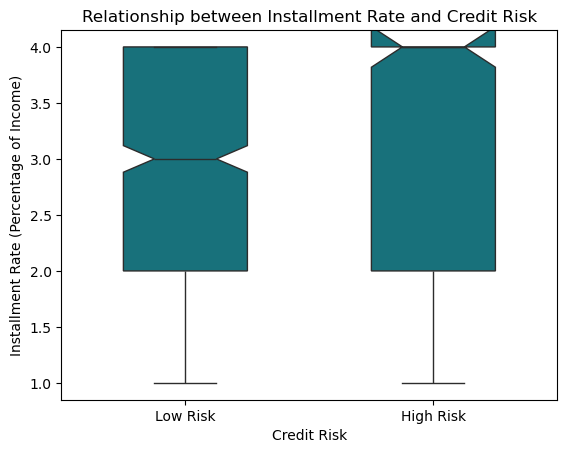

In [ ]:
boxplot(data = df, 
        x = 'CreditRisk', 
        y = 'InstallmentRate', 
        xlabel = 'Credit Risk', 
        ylabel = 'Installment Rate (Percentage of Income)', 
        title = 'Relationship between Installment Rate and Credit Risk', 
        filename = 'InstallmentRate_CreditRisk_boxplot.png')

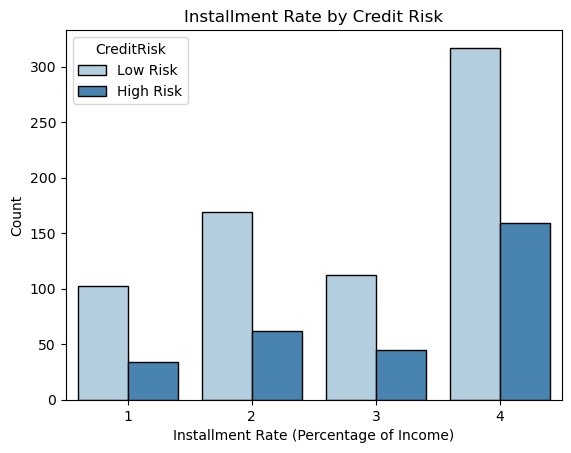

In [ ]:
bar_graph(data = df, 
          x = 'InstallmentRate', 
          hue = 'CreditRisk', 
          title = 'Installment Rate by Credit Risk', 
          xlabel = 'Installment Rate (Percentage of Income)', 
          filename = 'InstallmentRate_CreditRisk_barplot.png')

The majority of individuals fall into the Installment Rate categories of 3 and 4, and a significant proportion of high-risk borrowers take on relatveily high financial commitments. Borrowers who spend a lower percentage of their income (1 or 2) on loan payments are more likely to be classified as Low Risk. However, there are still some high-risk borrowers with Installment Rates of 1 and 2, indicating that installment rate may not be a useful factor determining credit risk.

##### 4.2.3.1.4. ResidenceDuration and CreditRisk

*ResidenceDuration* represents the number of years a borrower has lived at their current residence. Longer residence duration may indicate financial stability and reliability, potentially correlating with lower credit risk.

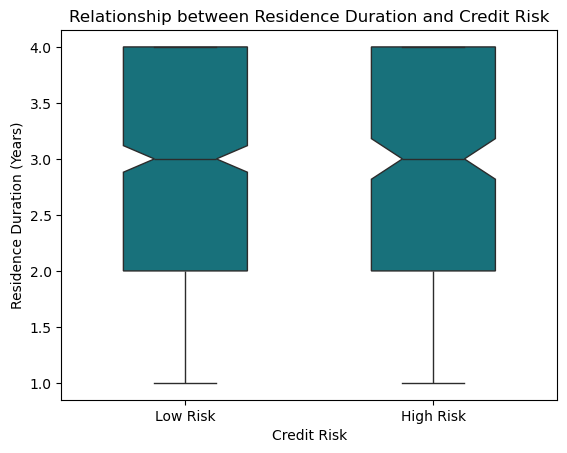

In [ ]:
boxplot(data = df, 
        x = 'CreditRisk', 
        y = 'ResidenceDuration', 
        xlabel = 'Credit Risk', 
        ylabel = 'Residence Duration (Years)', 
        title = 'Relationship between Residence Duration and Credit Risk', 
        filename = 'ResidenceDuration_CreditRisk_boxplot.png')

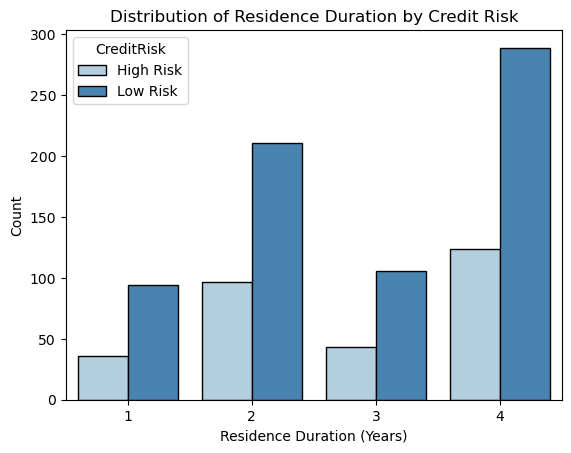

In [ ]:
bar_graph(data = df, 
          x = 'ResidenceDuration', 
          hue = 'CreditRisk', 
          xlabel = 'Residence Duration (Years)', 
          ylabel = 'Count', 
          title = 'Distribution of Residence Duration by Credit Risk', 
          filename = 'ResidenceDuration_CreditRisk_barplot.png')

The largest group of Low Risk borrowers has a Residence Duration of 4 years. High risk borrowers appear to follow no discernible pattern. 

##### 4.2.3.1.5. AgeYears and CreditRisk

*AgeYears* represents the borrower's age in years. Older individuals may have more financial stability and a longer credit history, potentially reducing their credit risk. Younger borrowers might be considered riskier due to limited financial history and potential income instability.

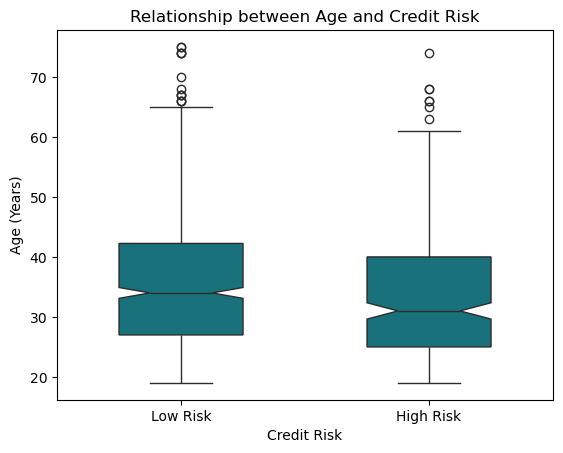

In [ ]:
boxplot(data = df, 
        x = 'CreditRisk', 
        y = 'AgeYears', 
        xlabel = 'Credit Risk', 
        ylabel = 'Age (Years)', 
        title = 'Relationship between Age and Credit Risk', 
        filename = 'AgeYears_CreditRisk_boxplot.png')

OLder individuals tend to have slighly lower credit risk, but the difference is not significant. 

##### 4.2.3.1.6. ExistingCredits and CreditRisk

*ExistingCredits* represents the number of active credit accounts or loans a borrower currently holds. Borrowers with more existing credits may have higher financial obligations, potentially leading to higher credit risk. However, responsible borrowers with multiple credit lines may still maintain a low risk if they have good repayment history.

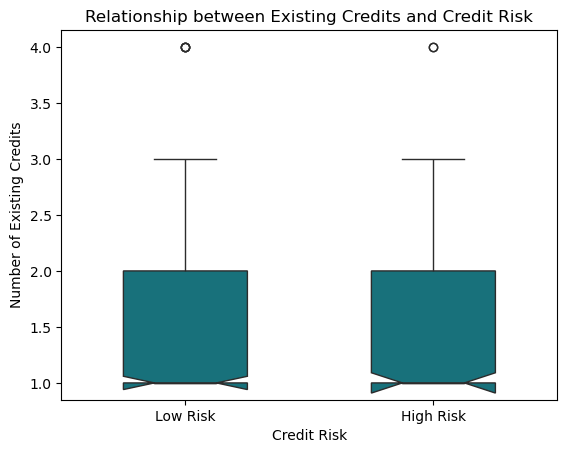

In [ ]:
boxplot(data = df, 
        x = 'CreditRisk', 
        y = 'ExistingCredits', 
        xlabel = 'Credit Risk', 
        ylabel = 'Number of Existing Credits', 
        title = 'Relationship between Existing Credits and Credit Risk', 
        filename = 'ExistingCredits_CreditRisk_boxplot.png')

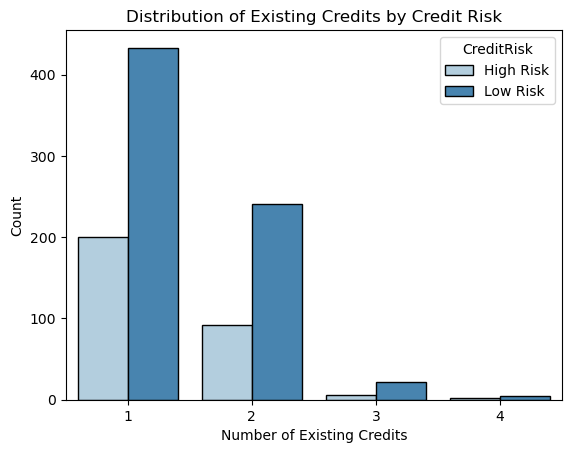

In [ ]:
bar_graph(data = df, 
          x = 'ExistingCredits', 
          hue = 'CreditRisk', 
          xlabel = 'Number of Existing Credits', 
          ylabel = 'Count', 
          title = 'Distribution of Existing Credits by Credit Risk', 
          filename = 'ExistingCredits_CreditRisk_barplot.png')

The majority of borrowers have either 1 or 2 existing credit accounts, and there a very few individuals with 3 or 4 credit cards. Low-risk borrowers outnumber high-risk borrowers in all groups. However, the proportion of high-risk borrowers increases slightly as the number of credits increases.

#### 4.2.4.2. Categorical Variables

##### 4.2.3.2.1. CheckingAccountStatus and CreditRisk

*CheckingAccountStatus* represents the status of the borrower's existing checking account, categorized into different financial tiers.  Borrowers with no checking account or very low balances may have a higher credit risk, while those with a larger savings may be lower risk.

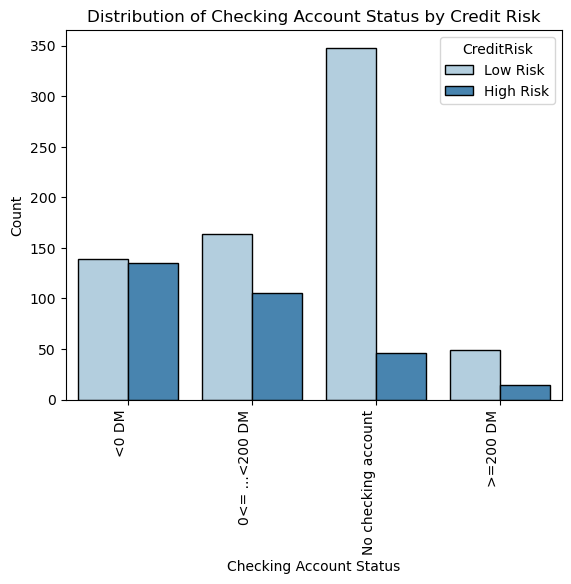

In [98]:
bar_graph(data = df, 
          x = 'CheckingAccountStatus', 
          hue = 'CreditRisk', 
          xlabel = 'Checking Account Status', 
          ylabel = 'Count', 
          title = 'Distribution of Checking Account Status by Credit Risk', 
          filename = 'CheckingAccountStatus_CreditRisk_barplot.png',
          xtick_rotation = 90)

The largest group in the dataset consists of borrowers with no checking account. This suggests that not having a checking account does not necessarily indicate high credit risk, which goes against expectations. Borrowers with negative balances (< 0 DM) or low balances (0 <= ... < 200 DM) are evenly split between Low Risk and High Risk indicating that low checking account balacnes are not strong indicators of credit risk. Borrowers with high balances are mostly low risk, alinging with expectations. 

##### 4.2.3.2.2. CreditHistory and CreditRisk

*CreditHistory* represents the borrower's past repayment behavior, including whether they have duly paid back previous loans, experienced delays, or defaulted. It is expected that borrowers with a history of delays or outstanding debts are more likely to be classified as High Risk, while those with perfect or good credit history should be predominantly Low Risk.

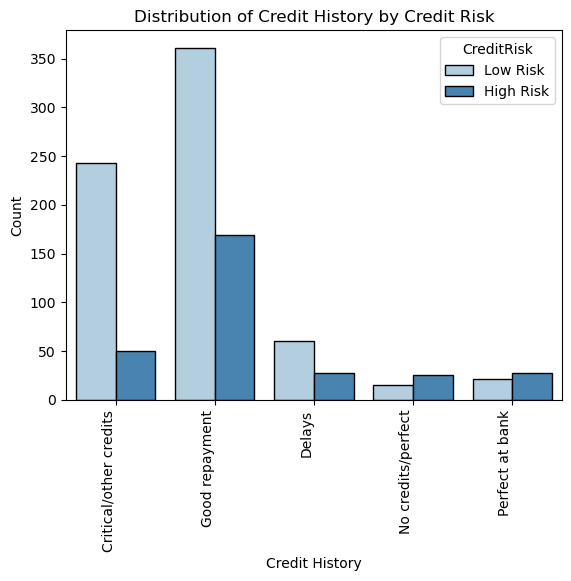

In [97]:
bar_graph(data = df, 
          x = 'CreditHistory', 
          hue = 'CreditRisk', 
          xlabel = 'Credit History', 
          ylabel = 'Count', 
          title = 'Distribution of Credit History by Credit Risk', 
          filename = 'CreditHistory_CreditRisk_barplot.png',
          xtick_rotation = 90)

The largest proportion of High Risk borrowers falls under the "Critical/Other Credits" category. This suggests that borrowers with existing debts outside of their primary lender or a poor credit standing are at a much higher risk of default. Borrowers with "Good Repayment" are mostly Low Risk, but some are still classified as High Risk, meaning repayment history alone is not the sole factor. Individuals with no credit history or perfect repayment records tend to be Low Risk, supporting the idea that clean credit history correlates with better financial standing.

##### 4.2.3.2.3. LoanPurpose and CreditRisk

*LoanPurpose* represents the reason for which the borrower is taking out a loan, such as for purchasing a car, financing education, or covering business expenses. Different loan purposes may have varying levels of risk. Loans for business or large purchases may have a higher risk due to the uncertainty of returns, whereas loans for necessities (e.g., appliances or education) might be lower risk.

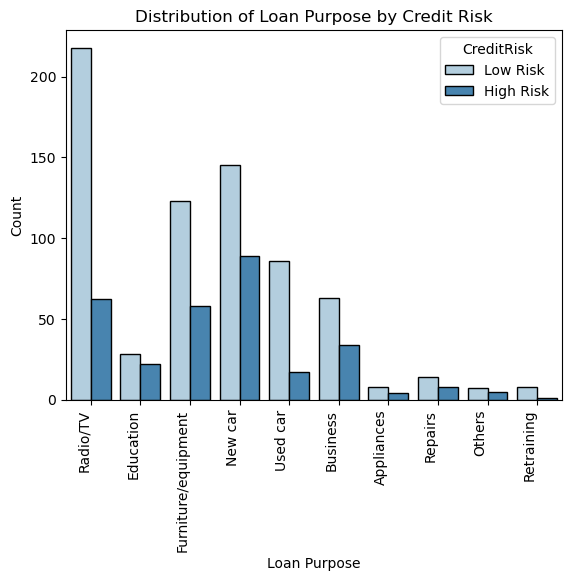

In [ ]:
bar_graph(data = df, 
          x = 'LoanPurpose', 
          hue = 'CreditRisk', 
          xlabel = 'Loan Purpose', 
          ylabel = 'Count', 
          title = 'Distribution of Loan Purpose by Credit Risk', 
          filename = 'LoanPurpose_CreditRisk_barplot.png',
          xtick_rotation = 90)

The most common loan purposes in the dataset are Radio/TV purchases and New Cars. A majority of borrowers taking loans for Radio/TV purchases and New Cars are Low Risk. Higher risk borrowers also make up a larger proportion of those who take out loans for a new car. Low risk credit borrowers appear to be more likely to buy a used car over a new car compared to high risk borrowers.

##### 4.2.3.2.4. SavingsAccountBonds and CreditRisk

*SavingsAccountBonds* represents the borrower's savings account balance, categorized into different financial tiers. Borrowers with higher savings are expected to have lower credit risk, as they have more financial stability. Conversely, borrowers with no savings or low balances may be more financially vulnerable and thus higher risk.

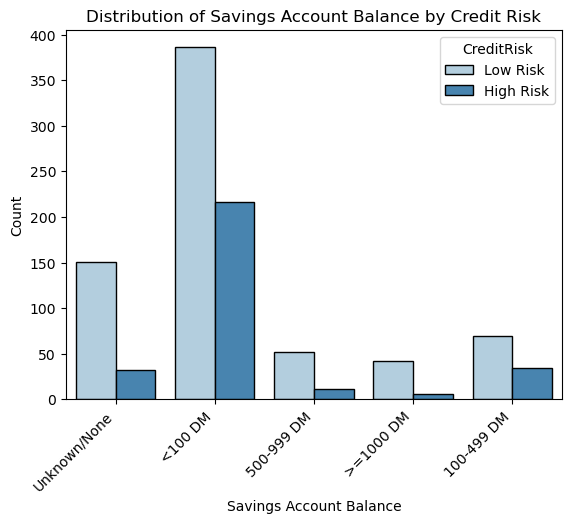

In [99]:
bar_graph(data = df, 
          x = 'SavingsAccountBonds', 
          hue = 'CreditRisk', 
          xlabel = 'Savings Account Balance', 
          ylabel = 'Count', 
          title = 'Distribution of Savings Account Balance by Credit Risk', 
          filename = 'SavingsAccountBonds_CreditRisk_barplot.png')

Most Borrowers Have Less Than 100 DM in Savings. While most of these borrowers are Low Risk, a significant portion are High Risk, suggesting that low savings is associated with a higher likelihood of default. Borrowers with ≥1000 DM in savings are overwhelmingly Low Risk. A significant number of borrowers fall into the "Unknown/None" savings category. The majority are Low Risk, but there are some High Risk borrowers, meaning that not having savings data alone is not enough to predict redit risk.

##### 4.2.3.2.5. EmploymentDuration and CreditRisk

*EmploymentDuration* represents how long a borrower has been employed, categorized into different time ranges (e.g., less than a year, 1-4 years, 4-7 years, and 7+ years). Borrowers with longer employment durations are expected to have greater financial stability and lower credit risk, while those with shorter employment durations or unemployment may be higher risk due to income instability.

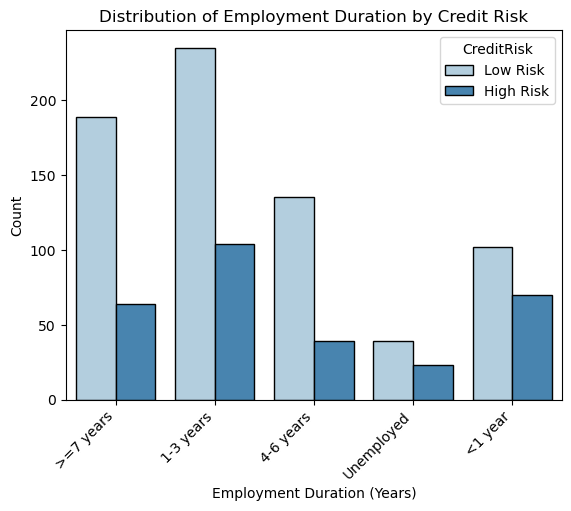

In [100]:
bar_graph(data = df, 
          x = 'EmploymentDuration', 
          hue = 'CreditRisk', 
          xlabel = 'Employment Duration (Years)', 
          ylabel = 'Count', 
          title = 'Distribution of Employment Duration by Credit Risk', 
          filename = 'EmploymentDuration_CreditRisk_barplot.png')


Longer employment durations (≥7 years) are strongly associated with Low Risk borrowers, supporitng the idea that job stability reduces credit risk. Short employment duration (<1 year) and unemployment increase the proportion of High Risk borrowers, supporting the link between financial instability and credit risk. Borrowers with 4-6 years of employment are mostly Low Risk, suggesting that 4+ years of stability significantly improves creditworthiness.

##### 4.2.3.2.6. PersonalStatusSex and CreditRisk

*PersonalStatusSex* represents the borrower's gender and marital status, categorized into different groups such as single, married, divorced, and separated for both males and females. While marital status may affect financial stability, gender itself should not be a direct predictor of credit risk.

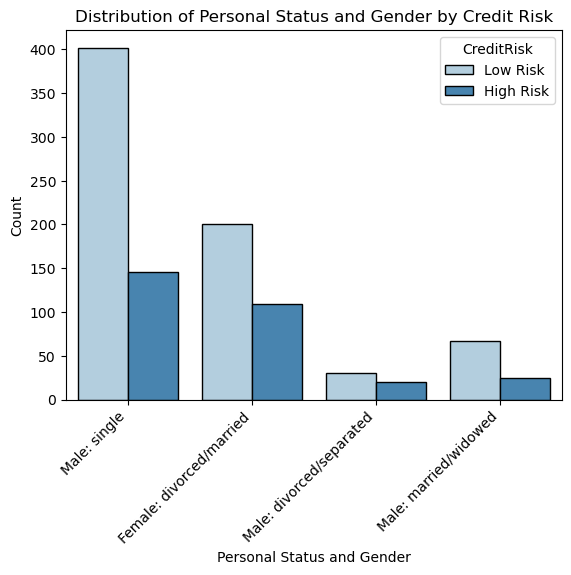

In [101]:
bar_graph(data = df, 
          x = 'PersonalStatusSex', 
          hue = 'CreditRisk', 
          xlabel = 'Personal Status and Gender', 
          ylabel = 'Count', 
          title = 'Distribution of Personal Status and Gender by Credit Risk', 
          filename = 'PersonalStatusSex_CreditRisk_barplot.png')

Single males dominate the dataset but have a high proportion of High Risk borrowers, indicating potential financial instability. Females (divorced/married) are mostly Low Risk, suggesting greater financial stability in these categories. Married/Widowed males have the fewest High Risk cases, supporting the idea that financial stability increases with marriage.

##### 4.2.3.2.7. OtherDebtorsGuarantors and CreditRisk

*OtherDebtorsGuarantors* represents whether the borrower has no co-signers, a co-applicant, or a guarantor on their loan application. Borrowers with no additional debtors may be more financially independent, while those with co-applicants or guarantors may indicate higher financial risk or shared financial obligations.

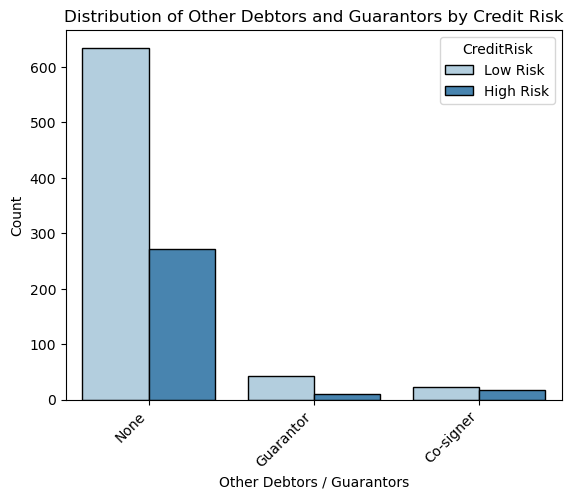

In [102]:
bar_graph(data = df, 
          x = 'OtherDebtorsGuarantors', 
          hue = 'CreditRisk', 
          xlabel = 'Other Debtors / Guarantors', 
          ylabel = 'Count', 
          title = 'Distribution of Other Debtors and Guarantors by Credit Risk', 
          filename = 'OtherDebtorsGuarantors_CreditRisk_barplot.png')

Most borrowers do not have co-signers or guarantors, and these borrowers have a balanced mix of Low and High Risk classifications. Having a guarantor appears to reduce credit risk, as most borrowers in this category are Low Risk. Co-signers are rare, but their risk distribution is more balanced, meaning they are not a strong indicator of credit risk.

##### 4.2.3.2.8. PropertyOwnership and CreditRisk

*PropertyOwnership* indicates whether the borrower owns real estate, savings/life insurance, a car/other valuable assets, or has no property at all. Borrowers with real estate or financial investments may have greater financial stability and thus a lower credit risk, while those with no property may be more financially vulnerable.

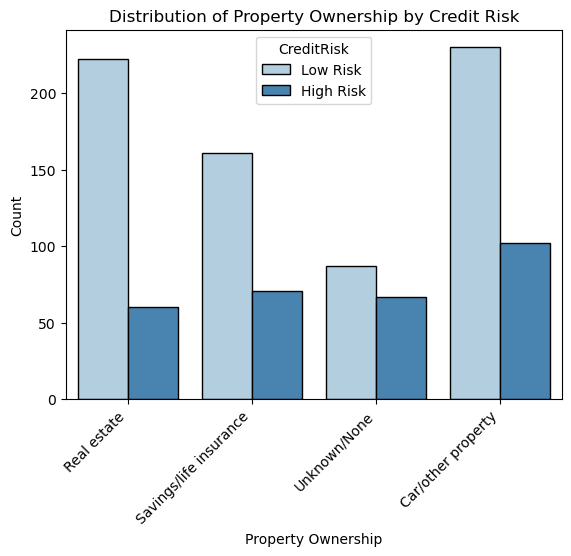

In [ ]:
bar_graph(data = df, 
          x = 'PropertyOwnership', 
          hue = 'CreditRisk', 
          xlabel = 'Property Ownership', 
          ylabel = 'Count', 
          title = 'Distribution of Property Ownership by Credit Risk', 
          filename = 'PropertyOwnership_CreditRisk_barplot.png')

Owning real estate or having savings/life insurance appears to be associated with Low Risk borrowers, reinforcing the importance of financial assets in credit risk. Borrowers with no recorded property have a much higher proportion of High Risk classifications, suggesting financial vulnerability.

##### 4.2.3.2.9. OtherInstallmentPlans and CreditRisk 

*OtherInstallmentPlans* indicates whether a borrower has additional installment plans through a bank, stores, or none at all. Borrowers with no other installment plans may have fewer financial obligations and thus lower credit risk, whereas those with multiple installment plans through banks or stores might have higher financial strain.

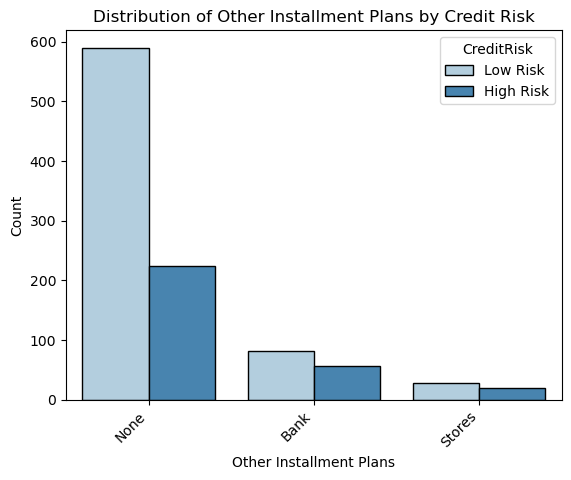

In [104]:
bar_graph(data = df, 
          x = 'OtherInstallmentPlans', 
          hue = 'CreditRisk', 
          xlabel = 'Other Installment Plans', 
          ylabel = 'Count', 
          title = 'Distribution of Other Installment Plans by Credit Risk', 
          filename = 'OtherInstallmentPlans_CreditRisk_barplot.png')

Most Borrowers Have No Other Installment Plans. The majority of borrowers have no other installment plans, and among them, most are classified as Low Risk. However, a substantial number of High Risk borrowers also fall into this category, indicating that while not having additional installments may help, it's not a guarantee of low risk.

##### 4.2.3.2.10. HousingStatus and CreditRisk 

*HousingStatus* indicates whether the borrower rents, owns, or lives in housing for free. Borrowers who own their home may have greater financial stability and lower credit risk, while renters or those living for free may face more financial uncertainty, potentially leading to higher risk.

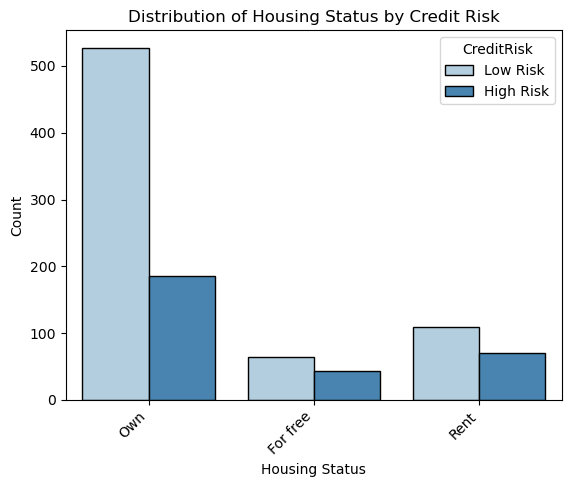

In [105]:
bar_graph(data = df, 
          x = 'HousingStatus', 
          hue = 'CreditRisk', 
          xlabel = 'Housing Status', 
          ylabel = 'Count', 
          title = 'Distribution of Housing Status by Credit Risk', 
          filename = 'HousingStatus_CreditRisk_barplot.png')

 Homeowners are mostly Low Risk, supporting the idea that homeownership is associated with financial stability. Renters have a higher proportion of High Risk borrowers, though many are still Low Risk. Living for free does not show a clear trend, suggesting that financial dependency can go either way in terms of credit risk.

##### 4.2.3.2.11. JobType and CreditRisk

*JobType* categorizes the borrower’s employment into unemployed/unskilled, unskilled resident, skilled employee, and highly qualified/management roles. Borrowers with higher-skilled jobs or management positions are expected to have lower credit risk due to more stable income and career prospects, while unemployed or unskilled workers may face higher financial instability, leading to greater risk.

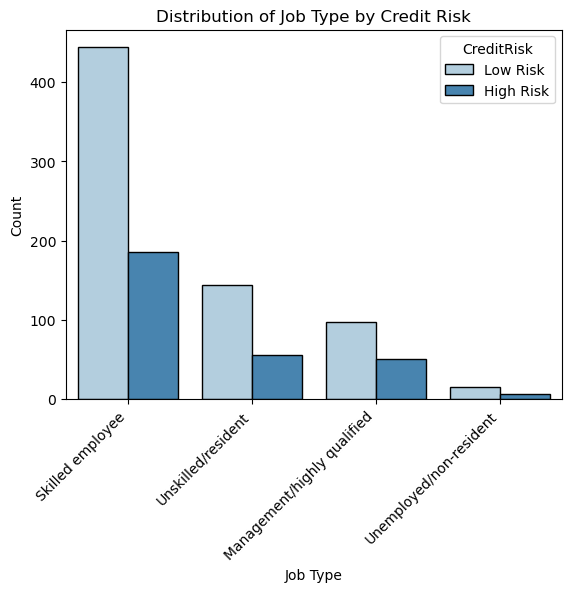

In [106]:
bar_graph(data = df, 
          x = 'JobType', 
          hue = 'CreditRisk', 
          xlabel = 'Job Type', 
          ylabel = 'Count', 
          title = 'Distribution of Job Type by Credit Risk', 
          filename = 'JobType_CreditRisk_barplot.png')

Skilled employees make up the largest borrower group, and most of them are Low Risk. 

##### 4.2.3.2.12. Telephone and CreditRisk 

*Telephone* indicates whether the borrower has a registered telephone number or not. Borrowers with a registered telephone may have more financial stability, as it could be a sign of a stable residence or established credit history. Those without a phone may be less financially secure or more difficult to contact, possibly increasing their credit risk.

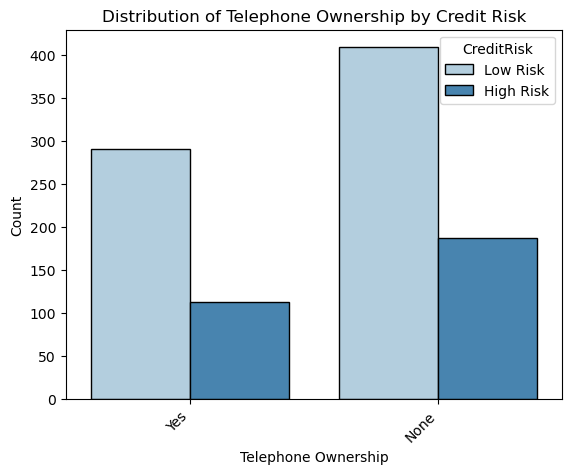

In [107]:
bar_graph(data = df, 
          x = 'Telephone', 
          hue = 'CreditRisk', 
          xlabel = 'Telephone Ownership', 
          ylabel = 'Count', 
          title = 'Distribution of Telephone Ownership by Credit Risk', 
          filename = 'Telephone_CreditRisk_barplot.png')

Borrowers with a registered telephone are more likely to be classified as Low Risk, possibly indicating better financial stability. Not having a telephone does not necessarily indicate High Risk, but there is a higher proportion of High Risk borrowers in this category. While telephone ownership may not be a direct predictor of credit risk, it may serve as an indirect indicator of financial stability and accessibility.

##### 4.2.3.2.13. ForeignWorker and CreditRisk

*ForeignWorker* indicates whether the borrower is a foreign worker (Yes) or not (No). Foreign workers may face more financial instability due to job uncertainty, visa limitations, or limited access to credit, potentially increasing their credit risk. However, if foreign workers are  employed in stable or high skill industries, their credit risk may be comparable to domestic workers.

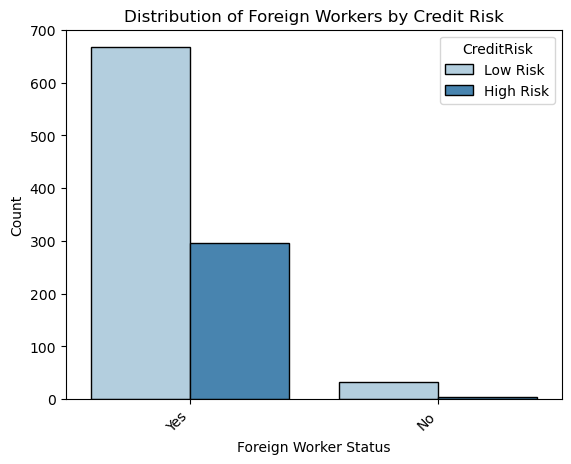

In [108]:
bar_graph(data = df, 
          x = 'ForeignWorker', 
          hue = 'CreditRisk', 
          xlabel = 'Foreign Worker Status', 
          ylabel = 'Count', 
          title = 'Distribution of Foreign Workers by Credit Risk', 
          filename = 'ForeignWorker_CreditRisk_barplot.png')

The dataset is overwhelmingly composed of foreign workers, making them the primary group for credit risk analysis. Foreign workers are mostly Low Risk, though a considerable number are classified as High Risk. Domestic workers are too few in number to draw definitive conclusions about their credit risk.

---

### Data Preprocessing

---

### Model Development

---

### Model Evaluation

---

## Results

---

## Conclusions

---